# Deep Hashing

In [ ]:
# CNN der preprocesseer: 
# Load the data,
# preprocess 
# output

In [1]:
import torch

if torch.cuda.is_available():
    print("CUDA is available! GPU detected: ", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available.")

CUDA is available! GPU detected:  NVIDIA GeForce RTX 3070 Ti


In [2]:
import tensorflow as tf

if tf.test.is_gpu_available(cuda_only=True):
    print("CUDA is available! GPU detected: ", tf.config.list_physical_devices('GPU'))
else:
    print("CUDA is not available.")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
CUDA is not available.


Testing matrix size: 5000 x 5000
CPU computation time for size 5000: 0.37 seconds
GPU computation time for size 5000: 0.00 seconds
Testing matrix size: 10000 x 10000
CPU computation time for size 10000: 2.18 seconds
GPU computation time for size 10000: 0.00 seconds
Testing matrix size: 15000 x 15000
CPU computation time for size 15000: 7.34 seconds
GPU computation time for size 15000: 0.00 seconds
Testing matrix size: 20000 x 20000
CPU computation time for size 20000: 17.13 seconds
GPU computation time for size 20000: 0.00 seconds
Testing matrix size: 25000 x 25000
CPU computation time for size 25000: 40.60 seconds
GPU computation time for size 25000: 0.00 seconds


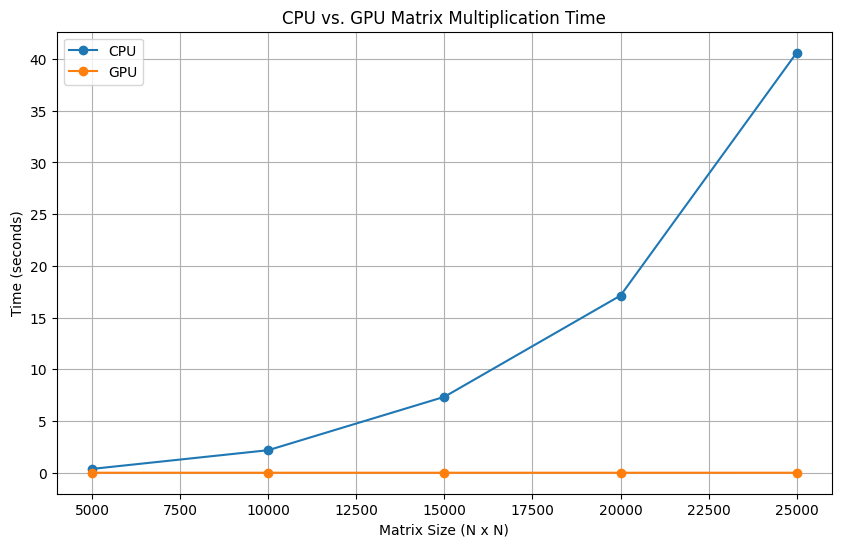

In [1]:
import torch
import time
import matplotlib.pyplot as plt

# Define matrix sizes to test
matrix_sizes = [5000, 10000,15000,20000,25000]
cpu_times = []
gpu_times = []

# Test each matrix size
for size in matrix_sizes:
    print(f"Testing matrix size: {size} x {size}")
    
    # CPU computation
    device_cpu = torch.device("cpu")
    A_cpu = torch.randn((size, size), device=device_cpu)
    B_cpu = torch.randn((size, size), device=device_cpu)

    # Measure time for CPU computation
    start_time = time.time()
    result_cpu = torch.matmul(A_cpu, B_cpu)
    cpu_time = time.time() - start_time
    cpu_times.append(cpu_time)
    print(f"CPU computation time for size {size}: {cpu_time:.2f} seconds")
    
    # GPU computation (if available)
    if torch.cuda.is_available():
        device_gpu = torch.device("cuda")
        A_gpu = torch.randn((size, size), device=device_gpu)
        B_gpu = torch.randn((size, size), device=device_gpu)
        
        # Warm-up GPU to avoid initialization overhead
        torch.matmul(A_gpu, B_gpu)

        # Measure time for GPU computation
        start_time = time.time()
        result_gpu = torch.matmul(A_gpu, B_gpu)
        gpu_time = time.time() - start_time
        gpu_times.append(gpu_time)
        print(f"GPU computation time for size {size}: {gpu_time:.2f} seconds")
    else:
        gpu_times.append(None)
        print("CUDA is not available. Skipping GPU test for this size.")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, cpu_times, marker='o', label='CPU')
plt.plot(matrix_sizes, gpu_times, marker='o', label='GPU')

plt.xlabel("Matrix Size (N x N)")
plt.ylabel("Time (seconds)")
plt.title("CPU vs. GPU Matrix Multiplication Time")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
nvcc --version

NameError: name 'nvcc' is not defined